# Predicting Solar Energy Production

# Importing all the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing the Dataset

In [2]:
data = pd.read_csv(r'C:\Users\Dell\OneDrive\Desktop\ISHIP 1\Solar Energy.csv')

C:\Users\Dell\AppData\Local\Temp\ipykernel_6912\3185394649.py:1: DtypeWarning: Columns (1,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r'C:\Users\Dell\OneDrive\Desktop\ISHIP 1\Solar Energy.csv')


# Data Cleaning and Preprocessing

In [3]:
data.head()

,Data Through Date,Project ID,Interconnection Date,Utility,City/Town,County,Zip,Division,Substation,Circuit ID,Developer,Metering Method,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Energy Storage System Size (kWac),Number of Projects
0,12/31/2023,SDG-66301,12/29/2023,Con Ed,Richmond Hill,Queens,11418.0,CENY-BK,Brownsville_2,9B05,Kamtech Solar Solutions,NM,6.05,5.17,7100,NaN,1
1,12/31/2023,SDG-66299,12/29/2023,Con Ed,Bronx,Bronx,10473.0,CENY-BX,Parkchester_2,5X67,Kamtech Solar Solutions,NM,6.74,5.76,7911,NaN,1
2,12/31/2023,SDG-66288,12/29/2023,Con Ed,Brooklyn,Kings,11225.0,CENY-BK,Bensonhurst_2,4B08,SUNCO,NM,3.05,2.61,3585,NaN,1
3,12/31/2023,SDG-66284,12/29/2023,Con Ed,Brooklyn,Kings,11236.0,CENY-BK,Bensonhurst_2,3037,Kamtech Solar Solutions,NM,5.62,4.80,6592,NaN,1
4,12/31/2023,SDG-66277,12/28/2023,Con Ed,Springfield Gardens,Queens,11413.0,CENY-Q,Jamaica,9112,Kamtech Solar Solutions,NM,6.05,5.17,7100,NaN,1


In [4]:
data.tail()

,Data Through Date,Project ID,Interconnection Date,Utility,City/Town,County,Zip,Division,Substation,Circuit ID,Developer,Metering Method,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Energy Storage System Size (kWac),Number of Projects
218110,12/31/2023,49.0,12/19/2002,RGE,Ontario,Wayne,14519.0,Sodus,0205LS0237-1589 RTE 104,0205LS0237,NaN,NM,2.81,2.4,3296,NaN,1
218111,12/31/2023,48.0,9/24/2002,RGE,Friendship,Allegany,14739.0,Fillmore,8333GV7702-Friendship Nile RD,8333GV7702,NaN,NM,2.93,2.5,3433,NaN,1
218112,12/31/2023,NaN,7/1/2018,PSEGLI,NaN,Suffolk,11786.0,NaN,NaN,NaN,NaN,FIT,34362.00,24900.0,40335490,NaN,1
218113,12/31/2023,NaN,3/3/2018,PSEGLI,NaN,Suffolk,11933.0,NaN,NaN,NaN,NaN,FIT,27600.00,20000.0,32397984,NaN,1
218114,12/31/2023,NaN,11/1/2011,PSEGLI,NaN,Suffolk,11973.0,NaN,NaN,NaN,NaN,FIT,43470.00,31500.0,51026825,NaN,1


In [5]:
data.corr()

C:\Users\Dell\AppData\Local\Temp\ipykernel_6912\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Zip,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Energy Storage System Size (kWac),Number of Projects
Zip,1.000000,0.074807,0.075416,0.074807,0.094028,NaN
Estimated PV System Size (kWdc),0.074807,1.000000,0.999919,1.000000,0.974801,NaN
PV System Size (kWac),0.075416,0.999919,1.000000,0.999919,0.974874,NaN
Estimated Annual PV Energy Production (kWh),0.074807,1.000000,0.999919,1.000000,0.974801,NaN
Energy Storage System Size (kWac),0.094028,0.974801,0.974874,0.974801,1.000000,NaN
Number of Projects,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print("Number of Rows", data.shape[0])
print("Number of Columns", data.shape[1])

Number of Rows 218115
Number of Columns 17


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218115 entries, 0 to 218114
Data columns (total 17 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Data Through Date                            218115 non-null  object 
 1   Project ID                                   218112 non-null  object 
 2   Interconnection Date                         218115 non-null  object 
 3   Utility                                      218115 non-null  object 
 4   City/Town                                    218057 non-null  object 
 5   County                                       218115 non-null  object 
 6   Zip                                          218019 non-null  float64
 7   Division                                     132881 non-null  object 
 8   Substation                                   138171 non-null  object 
 9   Circuit ID                                   218085 non-nul

In [8]:
data.describe()

,Zip,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Energy Storage System Size (kWac),Number of Projects
count,218019.000000,218115.000000,218115.000000,2.181150e+05,4091.000000,218115.0
mean,11751.734473,24.507977,19.065451,2.876828e+04,32.174727,1.0
std,962.129108,291.525394,211.419642,3.422042e+05,296.161116,0.0
min,10001.000000,0.010000,0.010000,1.400000e+01,0.350000,1.0
25%,11220.000000,5.270000,4.500000,6.180000e+03,5.000000,1.0
50%,11717.000000,7.130000,6.090000,8.364000e+03,7.600000,1.0
75%,12018.000000,10.240000,8.750000,1.201700e+04,10.000000,1.0
max,14905.000000,43470.000000,31500.000000,5.102682e+07,5000.000000,1.0


In [9]:
data.columns

Index(['Data Through Date', 'Project ID', 'Interconnection Date', 'Utility',
       'City/Town', 'County', 'Zip', 'Division', 'Substation', 'Circuit ID',
       'Developer', 'Metering Method', 'Estimated PV System Size (kWdc)',
       'PV System Size (kWac)', 'Estimated Annual PV Energy Production (kWh)',
       'Energy Storage System Size (kWac)', 'Number of Projects'],
      dtype='object')

In [10]:
data.duplicated().sum()

0

In [11]:
data.isnull().sum()/len(data) * 100

Data Through Date                               0.000000
Project ID                                      0.001375
Interconnection Date                            0.000000
Utility                                         0.000000
City/Town                                       0.026591
County                                          0.000000
Zip                                             0.044013
Division                                       39.077551
Substation                                     36.652225
Circuit ID                                      0.013754
Developer                                       4.835981
Metering Method                                 0.212273
Estimated PV System Size (kWdc)                 0.000000
PV System Size (kWac)                           0.000000
Estimated Annual PV Energy Production (kWh)     0.000000
Energy Storage System Size (kWac)              98.124384
Number of Projects                              0.000000
dtype: float64

In [12]:
data.isnull().sum()

Data Through Date                                   0
Project ID                                          3
Interconnection Date                                0
Utility                                             0
City/Town                                          58
County                                              0
Zip                                                96
Division                                        85234
Substation                                      79944
Circuit ID                                         30
Developer                                       10548
Metering Method                                   463
Estimated PV System Size (kWdc)                     0
PV System Size (kWac)                               0
Estimated Annual PV Energy Production (kWh)         0
Energy Storage System Size (kWac)              214024
Number of Projects                                  0
dtype: int64

In [13]:
columns_to_drop=['Project ID','Zip','Energy Storage System Size (kWac)','Circuit ID','Division','Substation']
data.drop(columns=columns_to_drop, axis=1, inplace=True)

In [14]:
data.head(5)

,Data Through Date,Interconnection Date,Utility,City/Town,County,Developer,Metering Method,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Number of Projects
0,12/31/2023,12/29/2023,Con Ed,Richmond Hill,Queens,Kamtech Solar Solutions,NM,6.05,5.17,7100,1
1,12/31/2023,12/29/2023,Con Ed,Bronx,Bronx,Kamtech Solar Solutions,NM,6.74,5.76,7911,1
2,12/31/2023,12/29/2023,Con Ed,Brooklyn,Kings,SUNCO,NM,3.05,2.61,3585,1
3,12/31/2023,12/29/2023,Con Ed,Brooklyn,Kings,Kamtech Solar Solutions,NM,5.62,4.80,6592,1
4,12/31/2023,12/28/2023,Con Ed,Springfield Gardens,Queens,Kamtech Solar Solutions,NM,6.05,5.17,7100,1


In [15]:
data.isnull().sum()/len(data) * 100

Data Through Date                              0.000000
Interconnection Date                           0.000000
Utility                                        0.000000
City/Town                                      0.026591
County                                         0.000000
Developer                                      4.835981
Metering Method                                0.212273
Estimated PV System Size (kWdc)                0.000000
PV System Size (kWac)                          0.000000
Estimated Annual PV Energy Production (kWh)    0.000000
Number of Projects                             0.000000
dtype: float64

In [16]:
data =data.dropna(subset=['City/Town'])

In [17]:
data['City/Town'] = data['City/Town'].apply(lambda x: x.lower())

In [18]:
data['City/Town'].value_counts()

staten island     12766
brooklyn          11946
bronx              5932
jamaica            4104
lindenhurst        2127
                  ...  
schodack              1
east pembroke         1
otisco                1
nelliston             1
ontario center        1
Name: City/Town, Length: 1911, dtype: int64

In [19]:
data['Developer'].unique()

array(['Kamtech Solar Solutions', 'SUNCO', 'Trinity Solar', ...,
       'Curtis Snyder', 'Performance Systems Contracting',
       'Solar Design Assoc. Inc.'], dtype=object)

In [20]:
data['Developer'].fillna(pd.Series(np.random.choice(data['Developer'].dropna().unique(), size=len(data['Developer']))), inplace=True)

In [21]:
data['Developer'].isnull().sum()

53

In [22]:
data['Developer'].fillna('Other', inplace=True)

In [23]:
data['Developer'].isnull().sum()

0

In [24]:
data['Metering Method'].unique()

array(['NM', 'CDG', 'RC', nan, 'RNM', 'FIT', 'RFP'], dtype=object)

In [25]:
data['Metering Method'].fillna(data['Metering Method'].mode()[0], inplace=True)

In [26]:
data.isnull().sum()

Data Through Date                              0
Interconnection Date                           0
Utility                                        0
City/Town                                      0
County                                         0
Developer                                      0
Metering Method                                0
Estimated PV System Size (kWdc)                0
PV System Size (kWac)                          0
Estimated Annual PV Energy Production (kWh)    0
Number of Projects                             0
dtype: int64

In [27]:
data['Metering Method'].value_counts()

NM     215604
RNM      1164
CDG      1090
RC        108
FIT        87
RFP         4
Name: Metering Method, dtype: int64

In [28]:
data = data[~data['Metering Method'].isin(['RC', 'FIT', 'RFP'])]

In [29]:
data['Metering Method'].value_counts()

NM     215604
RNM      1164
CDG      1090
Name: Metering Method, dtype: int64

In [30]:
data.columns

Index(['Data Through Date', 'Interconnection Date', 'Utility', 'City/Town',
       'County', 'Developer', 'Metering Method',
       'Estimated PV System Size (kWdc)', 'PV System Size (kWac)',
       'Estimated Annual PV Energy Production (kWh)', 'Number of Projects'],
      dtype='object')

In [31]:
data['Utility'].value_counts()

PSEGLI            84961
Con Ed            64648
National Grid     26400
Central Hudson    15080
O&R               12152
NYSEG             11754
RGE                2863
Name: Utility, dtype: int64

In [32]:
data['County'].value_counts()

Suffolk        51605
Nassau         32194
Queens         23007
Richmond       12765
Westchester    12308
               ...  
Seneca           167
Allegany         160
Schuyler         133
Lewis            100
Hamilton          44
Name: County, Length: 62, dtype: int64

In [33]:
data['Developer'].value_counts()

Vivint Solar                            12824
MOMENTUM SOLAR                          12698
Sunrun Inc                              12487
Solar City                              11627
Other                                    6402
                                        ...  
Vara Solar                                  1
Laura matthews (Collegiate Builders)        1
Map Energy Solutions, LLC                   1
GSPP Sentinel Heights Road, LLC             1
Solar Bear Energy LLC                       1
Name: Developer, Length: 2568, dtype: int64

In [34]:
data.head()

,Data Through Date,Interconnection Date,Utility,City/Town,County,Developer,Metering Method,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Number of Projects
0,12/31/2023,12/29/2023,Con Ed,richmond hill,Queens,Kamtech Solar Solutions,NM,6.05,5.17,7100,1
1,12/31/2023,12/29/2023,Con Ed,bronx,Bronx,Kamtech Solar Solutions,NM,6.74,5.76,7911,1
2,12/31/2023,12/29/2023,Con Ed,brooklyn,Kings,SUNCO,NM,3.05,2.61,3585,1
3,12/31/2023,12/29/2023,Con Ed,brooklyn,Kings,Kamtech Solar Solutions,NM,5.62,4.80,6592,1
4,12/31/2023,12/28/2023,Con Ed,springfield gardens,Queens,Kamtech Solar Solutions,NM,6.05,5.17,7100,1


In [35]:
data.isnull().sum()

Data Through Date                              0
Interconnection Date                           0
Utility                                        0
City/Town                                      0
County                                         0
Developer                                      0
Metering Method                                0
Estimated PV System Size (kWdc)                0
PV System Size (kWac)                          0
Estimated Annual PV Energy Production (kWh)    0
Number of Projects                             0
dtype: int64

In [36]:
data.head()

,Data Through Date,Interconnection Date,Utility,City/Town,County,Developer,Metering Method,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Number of Projects
0,12/31/2023,12/29/2023,Con Ed,richmond hill,Queens,Kamtech Solar Solutions,NM,6.05,5.17,7100,1
1,12/31/2023,12/29/2023,Con Ed,bronx,Bronx,Kamtech Solar Solutions,NM,6.74,5.76,7911,1
2,12/31/2023,12/29/2023,Con Ed,brooklyn,Kings,SUNCO,NM,3.05,2.61,3585,1
3,12/31/2023,12/29/2023,Con Ed,brooklyn,Kings,Kamtech Solar Solutions,NM,5.62,4.80,6592,1
4,12/31/2023,12/28/2023,Con Ed,springfield gardens,Queens,Kamtech Solar Solutions,NM,6.05,5.17,7100,1


# Detecting Outliers and removing them

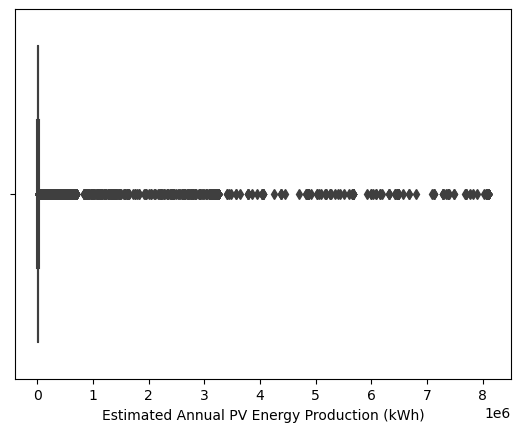

In [37]:
sns.boxplot(x=data['Estimated Annual PV Energy Production (kWh)'])
plt.show()

In [38]:
column_to_cap= 'Estimated Annual PV Energy Production (kWh)'

Q1=data[column_to_cap].quantile(0.25)
Q3=data[column_to_cap].quantile(0.75)
IQR=Q3-Q1

lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
data[column_to_cap]=data[column_to_cap].apply(lambda x: lower_limit if x < lower_limit else(upper_limit if x > upper_limit else x))

In [39]:
lower_limit

-2514.0

In [40]:
upper_limit

20670.0

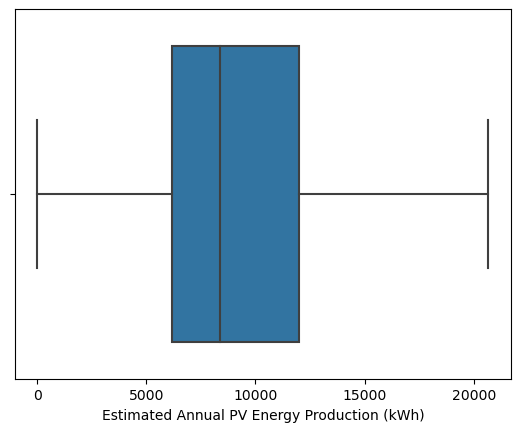

In [41]:
sns.boxplot(x=data['Estimated Annual PV Energy Production (kWh)'])
plt.show()

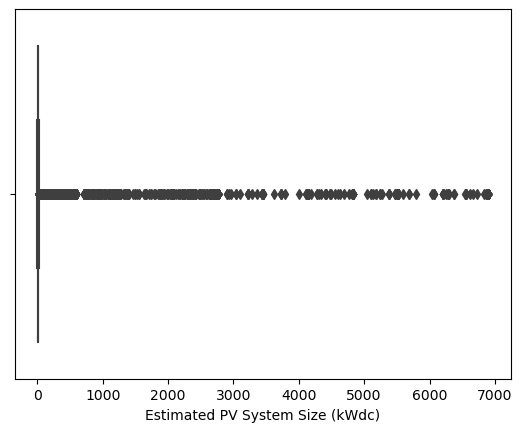

In [42]:
sns.boxplot(x=data['Estimated PV System Size (kWdc)'])
plt.show()

In [43]:
column_to_cap= 'Estimated PV System Size (kWdc)'

Q1=data[column_to_cap].quantile(0.25)
Q3=data[column_to_cap].quantile(0.75)
IQR=Q3-Q1

lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
data[column_to_cap]=data[column_to_cap].apply(lambda x: lower_limit if x < lower_limit else(upper_limit if x > upper_limit else x))

In [44]:
lower_limit

-2.125

In [45]:
upper_limit

17.595

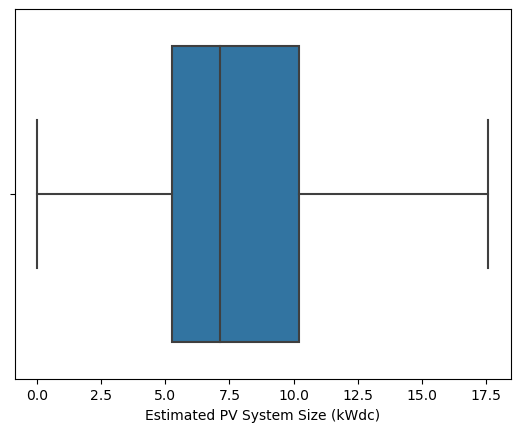

In [46]:
sns.boxplot(x=data['Estimated PV System Size (kWdc)'])
plt.show()

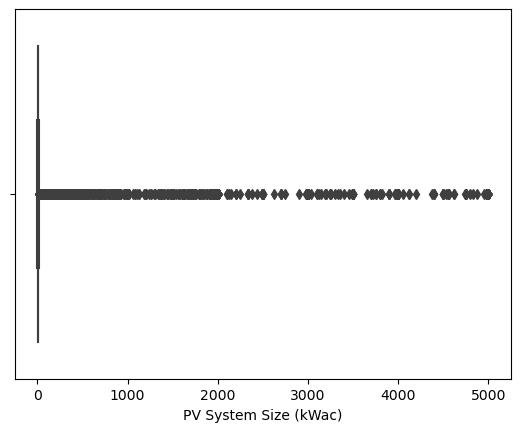

In [47]:
sns.boxplot(x=data['PV System Size (kWac)'])
plt.show()

In [48]:
column_to_cap= 'PV System Size (kWac)'

Q1=data[column_to_cap].quantile(0.25)
Q3=data[column_to_cap].quantile(0.75)
IQR=Q3-Q1

lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
data[column_to_cap]=data[column_to_cap].apply(lambda x: lower_limit if x < lower_limit else(upper_limit if x > upper_limit else x))

In [49]:
lower_limit

-1.830000000000001

In [50]:
upper_limit

15.05

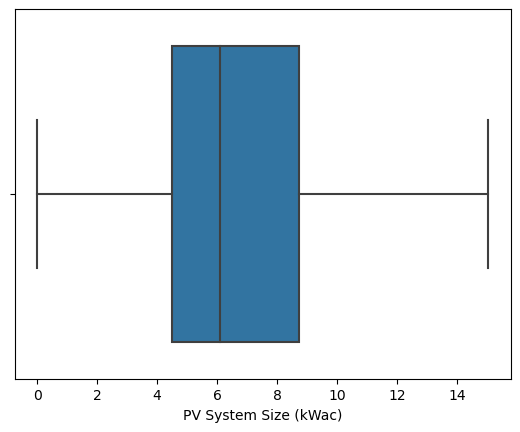

In [51]:
sns.boxplot(x=data['PV System Size (kWac)'])
plt.show()

# Exploratory Data Analysis

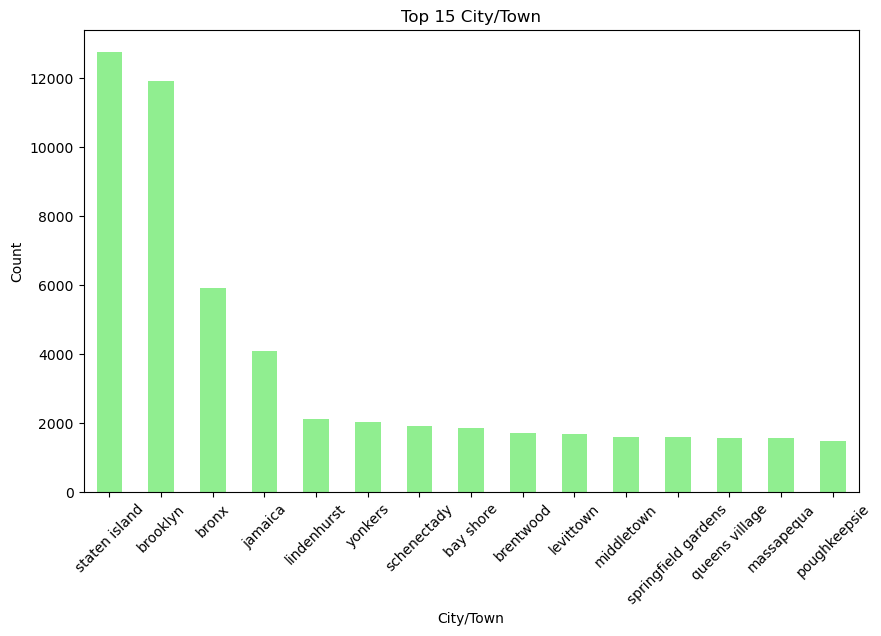

In [52]:
city_counts = data['City/Town'].value_counts()

top_n = 15
top_cities = city_counts.head(top_n)

plt.figure(figsize=(10, 6))
top_cities.plot(kind='bar', color='lightgreen')
plt.title(f'Top {top_n} City/Town')
plt.xlabel('City/Town')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


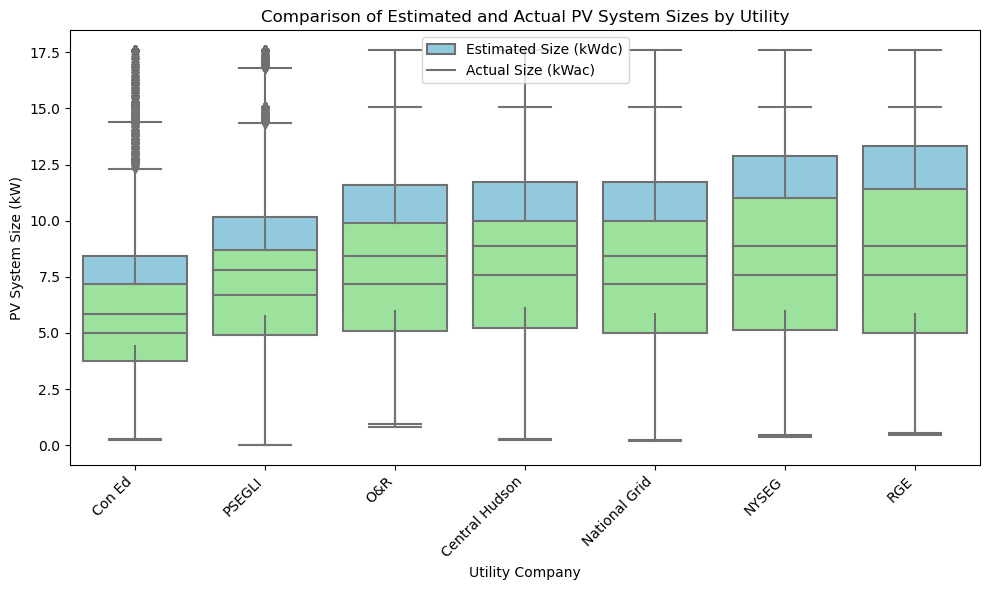

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Utility', y='Estimated PV System Size (kWdc)', data=data, color='skyblue')
sns.boxplot(x='Utility', y='PV System Size (kWac)', data=data, color='lightgreen')
plt.title('Comparison of Estimated and Actual PV System Sizes by Utility')
plt.xlabel('Utility Company')
plt.ylabel('PV System Size (kW)')
plt.xticks(rotation=45, ha='right')
plt.legend(labels=['Estimated Size (kWdc)', 'Actual Size (kWac)'])
plt.tight_layout()
plt.show()


In [54]:
numerical_variables = ["Estimated PV System Size (kWdc)", "PV System Size (kWac)", "Estimated Annual PV Energy Production (kWh)"]

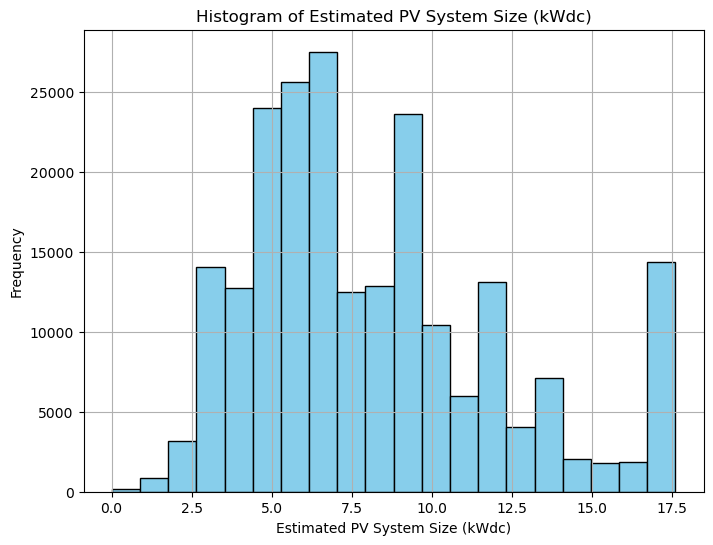

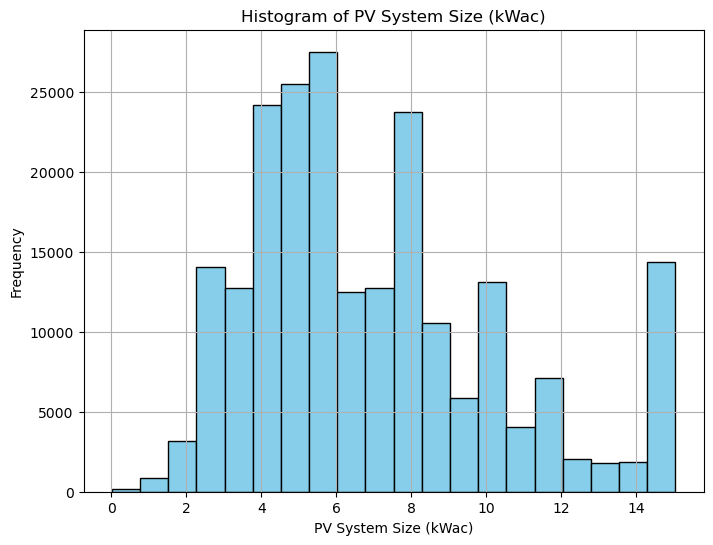

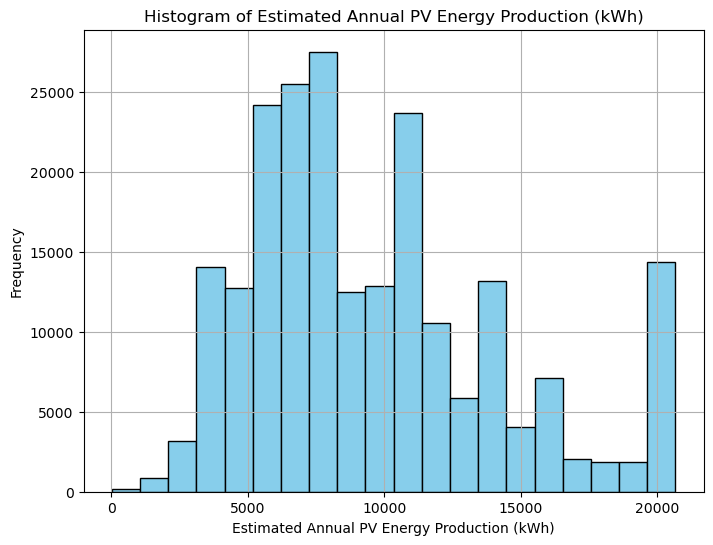

In [55]:
for var in numerical_variables:
    plt.figure(figsize=(8, 6))
    plt.hist(data[var], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [56]:
x = data['Estimated PV System Size (kWdc)']
y = data['Estimated Annual PV Energy Production (kWh)']

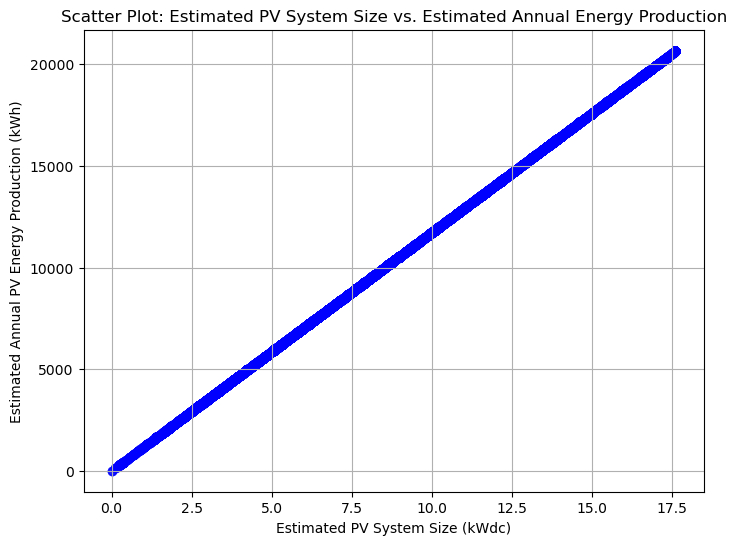

In [57]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5, color='blue')
plt.title('Scatter Plot: Estimated PV System Size vs. Estimated Annual Energy Production')
plt.xlabel('Estimated PV System Size (kWdc)')
plt.ylabel('Estimated Annual PV Energy Production (kWh)')
plt.grid(True)
plt.show()

In [58]:
metering_method_counts = data['Metering Method'].value_counts()

In [59]:
data['Metering Method'].value_counts().index

Index(['NM', 'RNM', 'CDG'], dtype='object')

Text(0.5, 1.0, 'Distribution of Metering Methods')

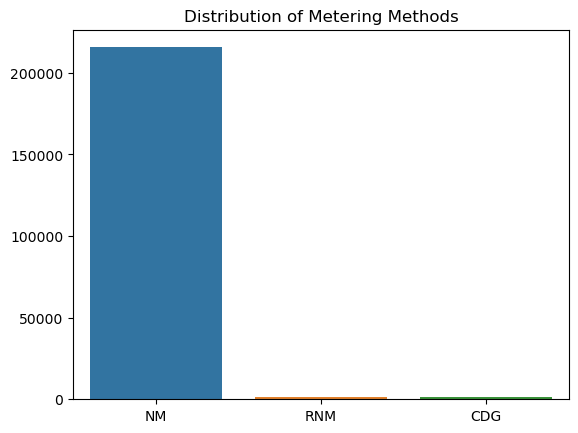

In [60]:
sns.barplot(x=metering_method_counts.index,y=metering_method_counts.values)
plt.title('Distribution of Metering Methods')


In [61]:
data.head()

,Data Through Date,Interconnection Date,Utility,City/Town,County,Developer,Metering Method,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Number of Projects
0,12/31/2023,12/29/2023,Con Ed,richmond hill,Queens,Kamtech Solar Solutions,NM,6.05,5.17,7100.0,1
1,12/31/2023,12/29/2023,Con Ed,bronx,Bronx,Kamtech Solar Solutions,NM,6.74,5.76,7911.0,1
2,12/31/2023,12/29/2023,Con Ed,brooklyn,Kings,SUNCO,NM,3.05,2.61,3585.0,1
3,12/31/2023,12/29/2023,Con Ed,brooklyn,Kings,Kamtech Solar Solutions,NM,5.62,4.80,6592.0,1
4,12/31/2023,12/28/2023,Con Ed,springfield gardens,Queens,Kamtech Solar Solutions,NM,6.05,5.17,7100.0,1


In [62]:
data['Data Through Date'] = pd.to_datetime(data['Data Through Date'])
data['Interconnection Date'] = pd.to_datetime(data['Interconnection Date'])

In [63]:
data.dtypes

Data Through Date                              datetime64[ns]
Interconnection Date                           datetime64[ns]
Utility                                                object
City/Town                                              object
County                                                 object
Developer                                              object
Metering Method                                        object
Estimated PV System Size (kWdc)                       float64
PV System Size (kWac)                                 float64
Estimated Annual PV Energy Production (kWh)           float64
Number of Projects                                      int64
dtype: object

In [64]:
for i in data.columns:
    if data[i].dtype == 'object':
        print(i)
        print(data[i].value_counts())
        print("/////////")

Utility
PSEGLI            84961
Con Ed            64648
National Grid     26400
Central Hudson    15080
O&R               12152
NYSEG             11754
RGE                2863
Name: Utility, dtype: int64
/////////
City/Town
staten island     12765
brooklyn          11935
bronx              5924
jamaica            4103
lindenhurst        2127
                  ...  
lily dale             1
pomoma                1
mt.  upton            1
new milford           1
ontario center        1
Name: City/Town, Length: 1908, dtype: int64
/////////
County
Suffolk        51605
Nassau         32194
Queens         23007
Richmond       12765
Westchester    12308
               ...  
Seneca           167
Allegany         160
Schuyler         133
Lewis            100
Hamilton          44
Name: County, Length: 62, dtype: int64
/////////
Developer
Vivint Solar                            12824
MOMENTUM SOLAR                          12698
Sunrun Inc                              12487
Solar City             

In [65]:
data.head()

,Data Through Date,Interconnection Date,Utility,City/Town,County,Developer,Metering Method,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Number of Projects
0,2023-12-31,2023-12-29,Con Ed,richmond hill,Queens,Kamtech Solar Solutions,NM,6.05,5.17,7100.0,1
1,2023-12-31,2023-12-29,Con Ed,bronx,Bronx,Kamtech Solar Solutions,NM,6.74,5.76,7911.0,1
2,2023-12-31,2023-12-29,Con Ed,brooklyn,Kings,SUNCO,NM,3.05,2.61,3585.0,1
3,2023-12-31,2023-12-29,Con Ed,brooklyn,Kings,Kamtech Solar Solutions,NM,5.62,4.80,6592.0,1
4,2023-12-31,2023-12-28,Con Ed,springfield gardens,Queens,Kamtech Solar Solutions,NM,6.05,5.17,7100.0,1


In [66]:
data1 = data.drop(columns=['Data Through Date','Interconnection Date','Number of Projects'],axis=1)

In [67]:
data1.head()

,Utility,City/Town,County,Developer,Metering Method,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh)
0,Con Ed,richmond hill,Queens,Kamtech Solar Solutions,NM,6.05,5.17,7100.0
1,Con Ed,bronx,Bronx,Kamtech Solar Solutions,NM,6.74,5.76,7911.0
2,Con Ed,brooklyn,Kings,SUNCO,NM,3.05,2.61,3585.0
3,Con Ed,brooklyn,Kings,Kamtech Solar Solutions,NM,5.62,4.80,6592.0
4,Con Ed,springfield gardens,Queens,Kamtech Solar Solutions,NM,6.05,5.17,7100.0


In [68]:
data1['Developer'].value_counts()

Vivint Solar                            12824
MOMENTUM SOLAR                          12698
Sunrun Inc                              12487
Solar City                              11627
Other                                    6402
                                        ...  
Vara Solar                                  1
Laura matthews (Collegiate Builders)        1
Map Energy Solutions, LLC                   1
GSPP Sentinel Heights Road, LLC             1
Solar Bear Energy LLC                       1
Name: Developer, Length: 2568, dtype: int64

In [69]:
data1['Developer'] = data1['Developer'].map(data1['Developer'].value_counts())
data1['City/Town'] = data1['City/Town'].map(data1['City/Town'].value_counts())
data1['County'] = data1['County'].map(data1['County'].value_counts())

In [70]:
data1.head()

,Utility,City/Town,County,Developer,Metering Method,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh)
0,Con Ed,287,23007,2709,NM,6.05,5.17,7100.0
1,Con Ed,5924,5924,2709,NM,6.74,5.76,7911.0
2,Con Ed,11935,11935,2519,NM,3.05,2.61,3585.0
3,Con Ed,11935,11935,2709,NM,5.62,4.80,6592.0
4,Con Ed,1592,23007,2709,NM,6.05,5.17,7100.0


In [71]:
X = data1.drop(columns=['Estimated Annual PV Energy Production (kWh)'],axis=1)
y = data1['Estimated Annual PV Energy Production (kWh)']

# Data Splitting

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [73]:
data1.head()

,Utility,City/Town,County,Developer,Metering Method,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh)
0,Con Ed,287,23007,2709,NM,6.05,5.17,7100.0
1,Con Ed,5924,5924,2709,NM,6.74,5.76,7911.0
2,Con Ed,11935,11935,2519,NM,3.05,2.61,3585.0
3,Con Ed,11935,11935,2709,NM,5.62,4.80,6592.0
4,Con Ed,1592,23007,2709,NM,6.05,5.17,7100.0


In [74]:
ohe_col = ['Utility','Metering Method']

### One Hot Encoder

In [75]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore',drop='first')
encoder.fit(X_train[ohe_col])

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [76]:
list(encoder.get_feature_names_out())

['Utility_Con Ed',
 'Utility_NYSEG',
 'Utility_National Grid',
 'Utility_O&R',
 'Utility_PSEGLI',
 'Utility_RGE',
 'Metering Method_NM',
 'Metering Method_RNM']

In [77]:
encoded_col = list(encoder.get_feature_names_out())

In [78]:
X_train[encoded_col] = encoder.transform(X_train[ohe_col])
X_test[encoded_col] = encoder.transform(X_test[ohe_col])

In [79]:
X_train.drop(columns=ohe_col,axis=1,inplace=True)
X_test.drop(columns=ohe_col,axis=1,inplace=True)

In [80]:
X_train.head()

,City/Town,County,Developer,Estimated PV System Size (kWdc),PV System Size (kWac),Utility_Con Ed,Utility_NYSEG,Utility_National Grid,Utility_O&R,Utility_PSEGLI,Utility_RGE,Metering Method_NM,Metering Method_RNM
57743,788,32194,672,8.89,7.60,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
173164,30,5300,4911,4.21,3.60,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
63415,472,51605,12698,5.09,4.35,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
34549,11935,11935,5393,4.45,3.80,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
54802,817,32194,4268,8.89,7.60,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [81]:
X_train.head()

,City/Town,County,Developer,Estimated PV System Size (kWdc),PV System Size (kWac),Utility_Con Ed,Utility_NYSEG,Utility_National Grid,Utility_O&R,Utility_PSEGLI,Utility_RGE,Metering Method_NM,Metering Method_RNM
57743,788,32194,672,8.89,7.60,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
173164,30,5300,4911,4.21,3.60,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
63415,472,51605,12698,5.09,4.35,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
34549,11935,11935,5393,4.45,3.80,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
54802,817,32194,4268,8.89,7.60,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [82]:
X_train.columns

Index(['City/Town', 'County', 'Developer', 'Estimated PV System Size (kWdc)',
       'PV System Size (kWac)', 'Utility_Con Ed', 'Utility_NYSEG',
       'Utility_National Grid', 'Utility_O&R', 'Utility_PSEGLI', 'Utility_RGE',
       'Metering Method_NM', 'Metering Method_RNM'],
      dtype='object')

In [83]:
num_col= ['City/Town', 'County', 'Developer', 'Estimated PV System Size (kWdc)',
       'PV System Size (kWac)']

In [84]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train[num_col])

MinMaxScaler()

In [85]:
X_train[num_col] = scaler.transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

In [86]:
def adjusted_r2_score(y_true, y_pred, n_samples, n_features):
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - ((1 - r2) * (n_samples - 1) / (n_samples - n_features - 1))
    return adjusted_r2

# Linear Regression

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse, r2_score
lr = LinearRegression()
lr.fit(X_train,y_train)
y_predict = lr.predict(X_test)
n_samples = len(y_test)
n_features = X_test.shape[1]
mse(y_test,y_predict), r2_score(y_test,y_predict), adjusted_r2_score(y_test,y_predict,n_samples, n_features)

(0.8624358722947318, 0.9999999593943301, 0.9999999593822112)

In [88]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error as mse, r2_score
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}


grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)


best_ridge = grid_search.best_estimator_


n_samples_test = len(y_test)
n_features_test = X_test.shape[1]


y_predict_ridge = best_ridge.predict(X_test)

ridge_mse = mse(y_test, y_predict_ridge)
ridge_r2 = r2_score(y_test, y_predict_ridge)
ridge_adj_r2 = adjusted_r2_score(y_test, y_predict_ridge, n_samples_test, n_features_test)

print("Ridge Regression:")
print("MSE:", ridge_mse)
print("R2 Score:", ridge_r2)
print("Adjusted R2 Score:", ridge_adj_r2)


Ridge Regression:
MSE: 1.0417272099063974
R2 Score: 0.9999999509528388
Adjusted R2 Score: 0.9999999509382005


In [89]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Random Forest

In [90]:
from sklearn.metrics import mean_squared_error as mse, r2_score
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_predict = rf.predict(X_test)
n_samples = len(y_test)
n_features = X_test.shape[1]
mse(y_test,y_predict), r2_score(y_test,y_predict), adjusted_r2_score(y_test,y_predict,n_samples, n_features)

(0.18906180094060482, 0.9999999910984905, 0.9999999910958338)

# Gradient Boosting

In [91]:
from sklearn.metrics import mean_squared_error as mse, r2_score
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)
y_predict = gb.predict(X_test)
n_samples = len(y_test)
n_features = X_test.shape[1]
mse(y_test,y_predict), r2_score(y_test,y_predict), adjusted_r2_score(y_test,y_predict,n_samples, n_features)

(593.9134495757579, 0.9999720370472626, 0.9999720287016456)